<img src="https://certificate.tpq.io/taim_logo.png" width="350px" align="right">

# Artificial Intelligence in Finance

## Financial Singularity

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

## What is at Stake?

In [ ]:
!git clone https://github.com/tpq-classes/ai_in_finance_book.git
import sys
sys.path.append('ai_in_finance_book')


In [1]:
import random
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [2]:
url = 'https://hilpisch.com/aiif_eikon_eod_data.csv'

In [3]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)

In [4]:
symbol = 'EUR='

In [5]:
raw['bull'] = np.log(raw[symbol] / raw[symbol].shift(1))

In [6]:
data = pd.DataFrame(raw['bull']).loc['2015-01-01':]

In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2015-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bull    1305 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


In [9]:
np.random.seed(100)

In [10]:
data['random'] = np.random.choice([-1, 1], len(data)) * data['bull']

In [11]:
data['bear'] = -data['bull']

In [12]:
def top(t):
    top = pd.DataFrame(data['bull'])
    top.columns = ['top']
    top = top.sort_values('top')
    n = int(len(data) * t)
    top['top'].iloc[:n] = abs(top['top'].iloc[:n])
    top['top'].iloc[n:] = abs(top['top'].iloc[n:])
    top['top'].iloc[n:-n] = np.random.choice([-1, 1],
                    len(top['top'].iloc[n:-n])) * top['top'].iloc[n:-n]
    data[f'{int(t * 100)}_top'] = top.sort_index()

In [13]:
for t in [0.1, 0.15]:
    top(t)

/tmp/ipykernel_2832/3751778605.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  top['top'].iloc[:n] = abs(top['top'].iloc[:n])
/tmp/ipykernel_2832/3751778605.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

In [14]:
def afi(ratio):
    correct = np.random.binomial(1, ratio, len(data))
    random = np.random.choice([-1, 1], len(data))
    strat = np.where(correct, abs(data['bull']), random * data['bull'])
    data[f'{int(ratio * 100)}_afi'] = strat

In [15]:
for ratio in [0.51, 0.6, 0.75, 0.9]:
    afi(ratio)

In [16]:
data.head()

,bull,random,bear,10_top,15_top,51_afi,60_afi,75_afi,90_afi
Date,,,,,,,,,
2015-01-01,0.000413,-0.000413,-0.000413,0.000413,-0.000413,0.000413,0.000413,0.000413,0.000413
2015-01-02,-0.008464,0.008464,0.008464,0.008464,0.008464,0.008464,0.008464,0.008464,0.008464
2015-01-05,-0.005767,-0.005767,0.005767,-0.005767,0.005767,-0.005767,0.005767,-0.005767,0.005767
2015-01-06,-0.003611,-0.003611,0.003611,-0.003611,0.003611,0.003611,0.003611,0.003611,0.003611
2015-01-07,-0.004299,-0.004299,0.004299,0.004299,0.004299,0.004299,0.004299,0.004299,0.004299


In [17]:
data.sum().apply(np.exp)

bull       0.926676
random     1.097137
bear       1.079126
10_top     9.815383
15_top    21.275448
51_afi    12.272497
60_afi    22.103642
75_afi    49.227314
90_afi    98.176658
dtype: float64

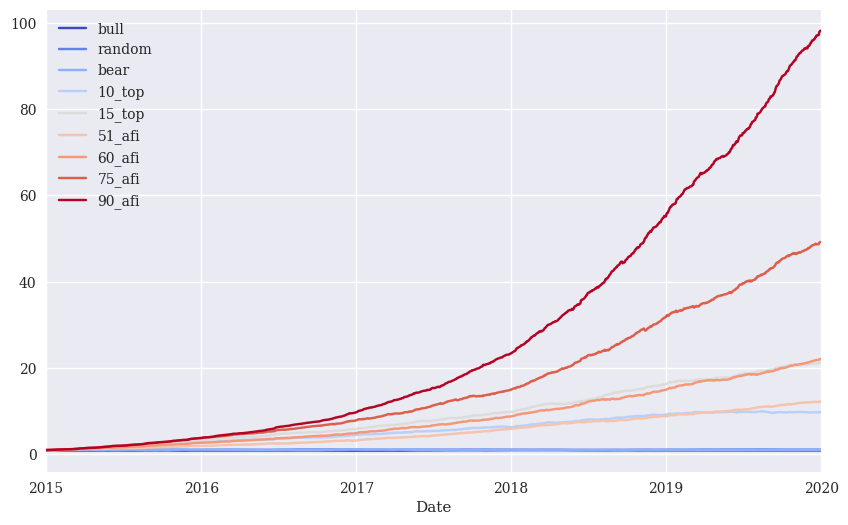

In [18]:
data.cumsum().apply(np.exp).plot(figsize=(10, 6), cmap='coolwarm');

In [19]:
import cufflinks
cufflinks.set_config_file(offline=True)

Error importing optional module skimage
Traceback (most recent call last):
  File "/anaconda/lib/python3.10/site-packages/_plotly_utils/optional_imports.py", line 28, in get_module
    return import_module(name)
  File "/anaconda/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/anaconda/lib/python3.10/site-packages/skimage/__init__.py", line 151, in <module>
    from ._shared import geometry
  File "skimage/_shared/geometry.pyx", line 1, in init skimage._shared.geometry
V

In [20]:
data.cumsum().apply(np.exp).iplot(colorscale='RdBu')

/anaconda/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of scatter.line
        Received value: 'rgba(178, 24, 43, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>